## Нелинейная регрессия
Необходимо реализовать нейросетевую аппроксимацию для каждой из двух следущих функций, заданных на отрезке:  
$$f_1(x) = \sin(x + x^2), x\in[0, 5]$$
$$f_2(x) = ln(x + 2 \sin x), x\in[1, 10]$$


## $$f_1(x) = \sin(x + x^2), x\in[0, 5]$$

In [2]:
from matplotlib import pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import warnings
warnings.filterwarnings('ignore')

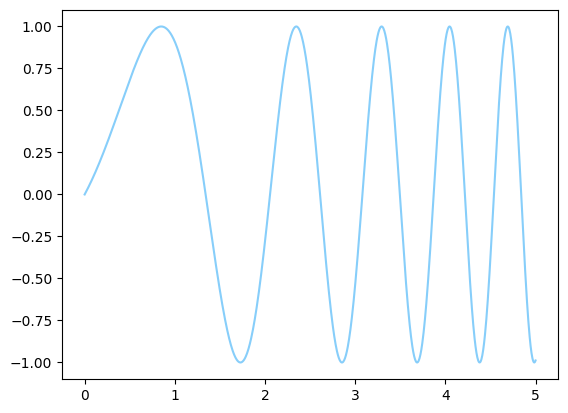

In [3]:
def f1(x):
    return np.sin(x + x**2)

xx1 = np.linspace(0, 5, 1000, dtype=np.float32)
yy1 = f1(xx1)
plt.plot(xx1, yy1, color = 'lightskyblue')

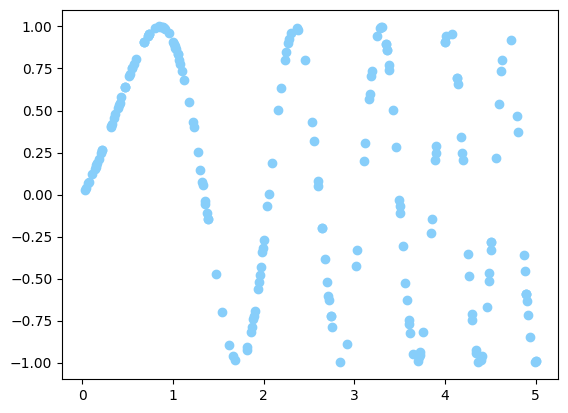

In [4]:
np.random.seed(5)
x1 = np.sort(np.random.choice(xx1, 200))
x1 = x1.reshape(len(x1), 1)
y1 = f1(x1)
plt.plot(x1, y1, 'o', color = 'lightskyblue')

In [5]:
input_size = 1
hidden_size_1 = 100
hidden_size_2 = 50
hidden_size_3 = 25
output_size = 1
num_epochs = 200000
learning_rate = 0.01

model = nn.Sequential(nn.Linear(input_size, hidden_size_1), nn.ReLU(), nn.Linear(hidden_size_1, hidden_size_2), nn.ReLU(),
                    nn.Linear(hidden_size_2, hidden_size_3), nn.ReLU(), nn.Linear(hidden_size_3, output_size)) 
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Epoch [20000/200000], Loss: 0.2254
Epoch [40000/200000], Loss: 0.0855
Epoch [60000/200000], Loss: 0.0564
Epoch [80000/200000], Loss: 0.0449
Epoch [100000/200000], Loss: 0.0305
Epoch [120000/200000], Loss: 0.0119
Epoch [140000/200000], Loss: 0.0053
Epoch [160000/200000], Loss: 0.0091
Epoch [180000/200000], Loss: 0.0035
Epoch [200000/200000], Loss: 0.0030


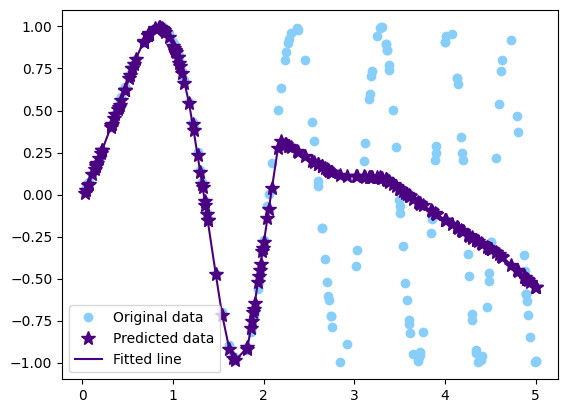

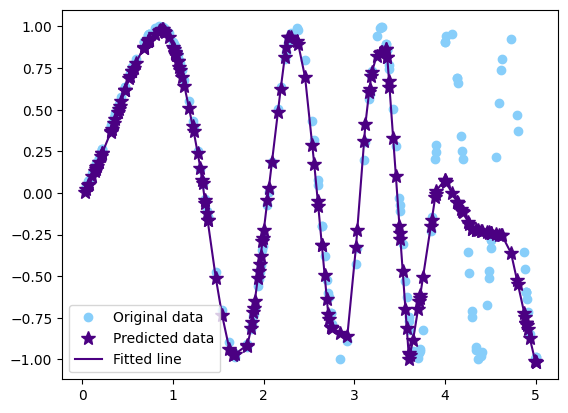

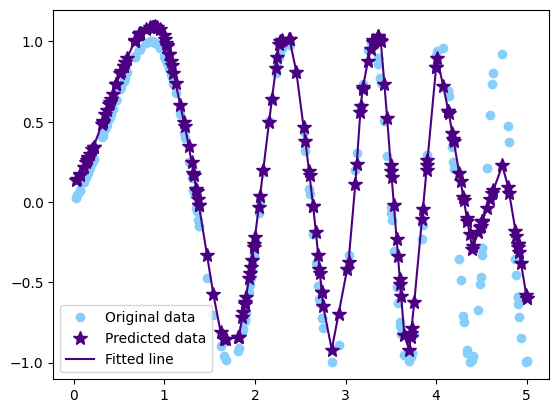

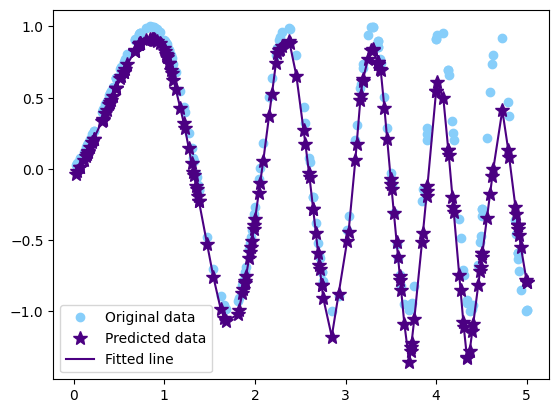

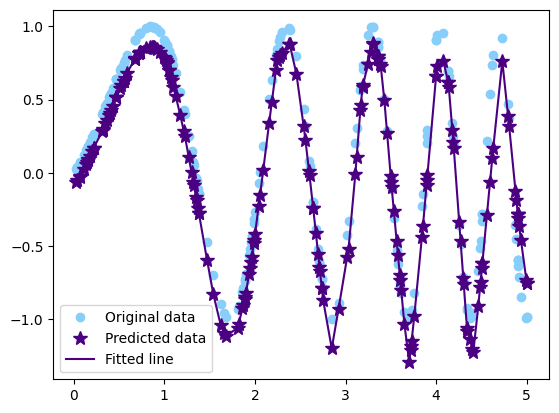

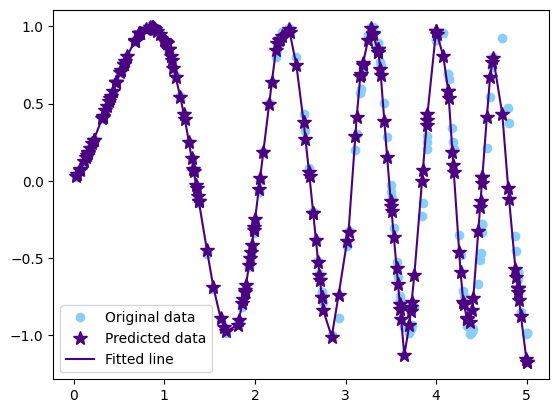

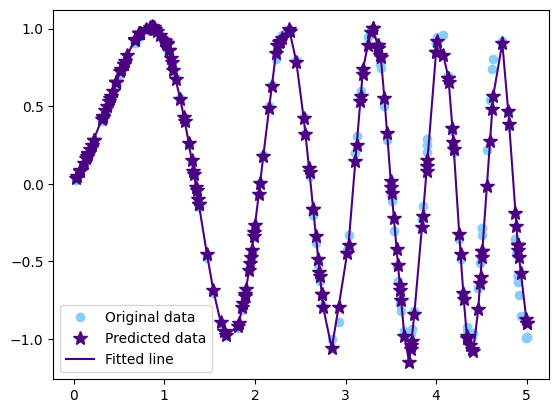

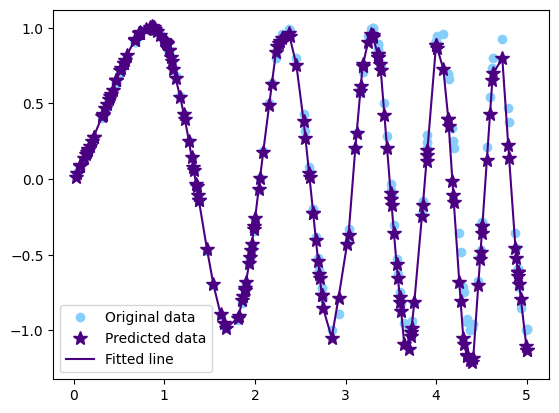

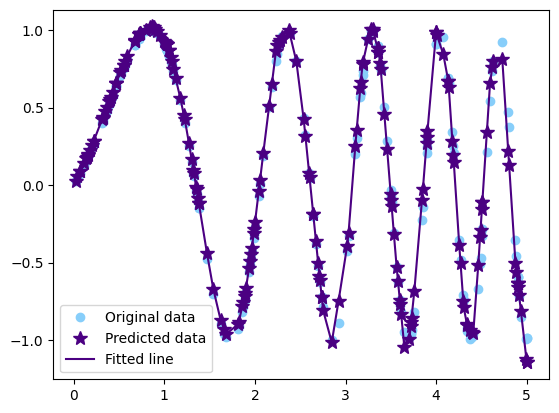

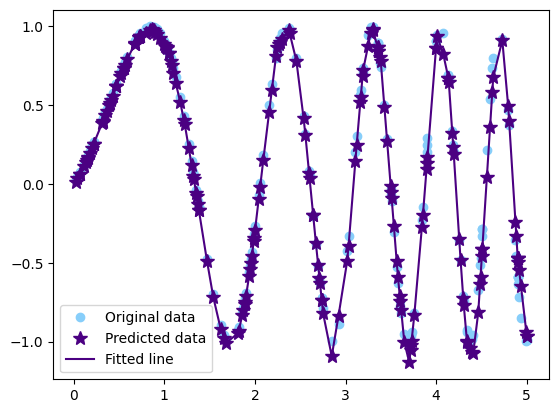

In [6]:
inputs = torch.from_numpy(x1)
targets = torch.from_numpy(y1)

for epoch in range(num_epochs):

    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 20000 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        plt.figure()
        plt.plot(inputs.numpy(), targets.numpy(), 'o', color = 'lightskyblue', label='Original data')
        plt.plot(inputs.numpy(), outputs.detach().numpy(), '*', markersize=10, color = 'indigo', label = 'Predicted data')
        plt.plot(inputs.numpy(), outputs.detach().numpy(), color = 'indigo', label='Fitted line')
        plt.legend()

## $$f_2(x) = ln(x + 2 \sin x), x\in[1, 10]$$

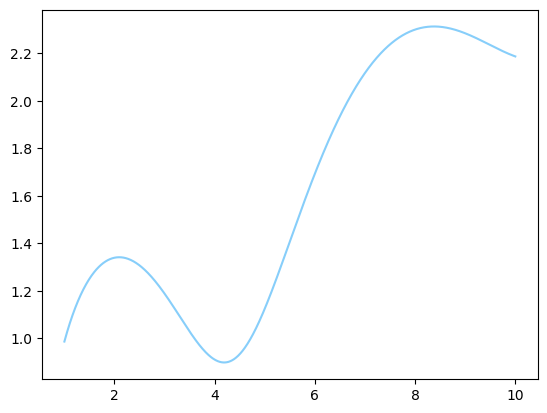

In [7]:
def f2(x):
    return np.log(x + 2 * np.sin(x))

xx2 = np.linspace(1, 10, 1000, dtype=np.float32)
yy2 = f2(xx2)
plt.plot(xx2, yy2, color = 'lightskyblue')

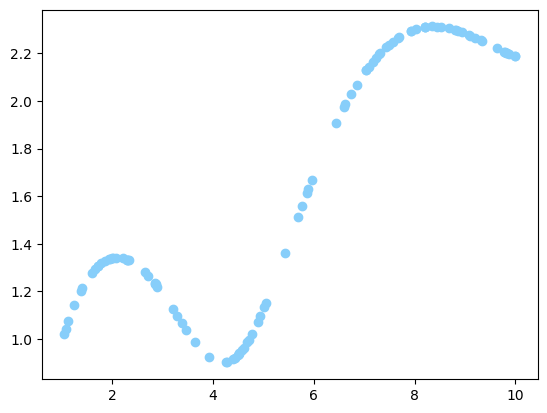

In [8]:
np.random.seed(5)
x2 = np.sort(np.random.choice(xx2, 100))
x2 = x2.reshape(len(x2), 1)
y2 = f2(x2)
plt.plot(x2, y2, 'o', color = 'lightskyblue')

In [9]:
input_size = 1
hidden_size_1 = 100
hidden_size_2 = 50
hidden_size_3 = 25
output_size = 1
num_epochs = 30000
learning_rate = 0.005

model = nn.Sequential(nn.Linear(input_size, hidden_size_1), nn.ReLU(), nn.Linear(hidden_size_1, hidden_size_2), nn.ReLU(),
                    nn.Linear(hidden_size_2, hidden_size_3), nn.ReLU(), nn.Linear(hidden_size_3, output_size)) 
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Epoch [3000/30000], Loss: 0.0424
Epoch [6000/30000], Loss: 0.0313
Epoch [9000/30000], Loss: 0.0168
Epoch [12000/30000], Loss: 0.0045
Epoch [15000/30000], Loss: 0.0019
Epoch [18000/30000], Loss: 0.0010
Epoch [21000/30000], Loss: 0.0002
Epoch [24000/30000], Loss: 0.0001
Epoch [27000/30000], Loss: 0.0002
Epoch [30000/30000], Loss: 0.0003


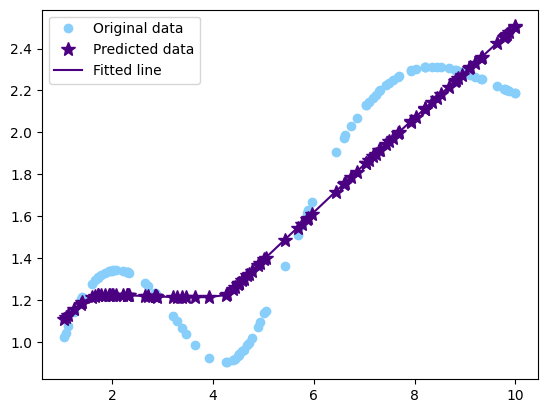

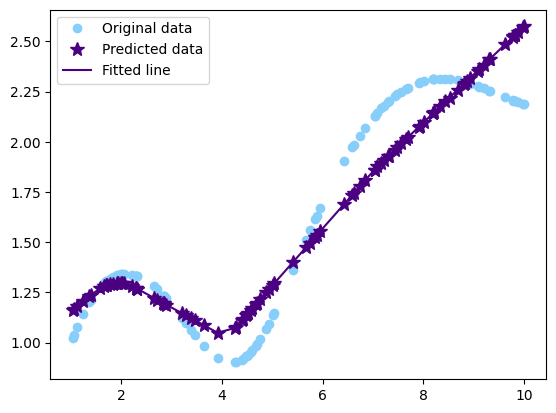

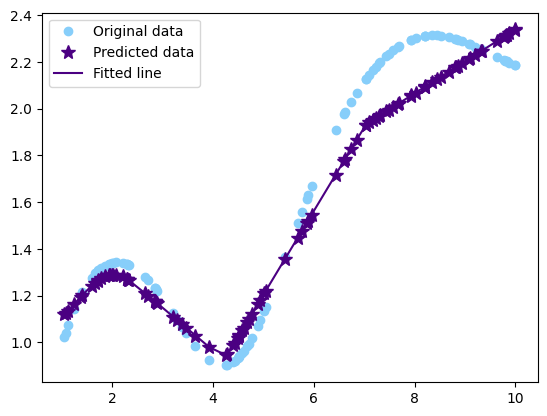

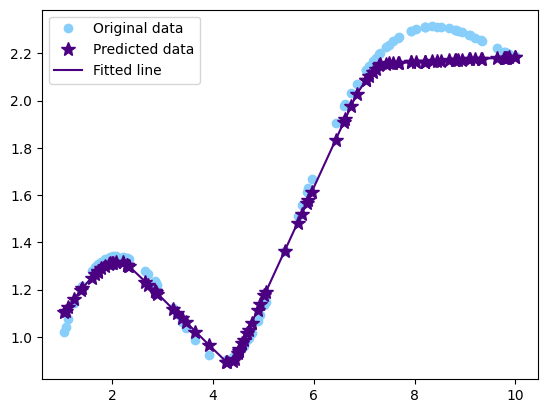

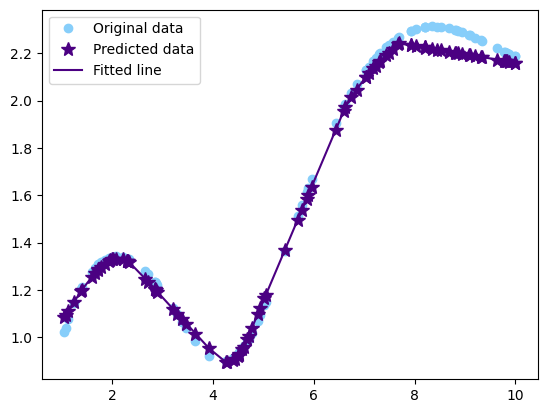

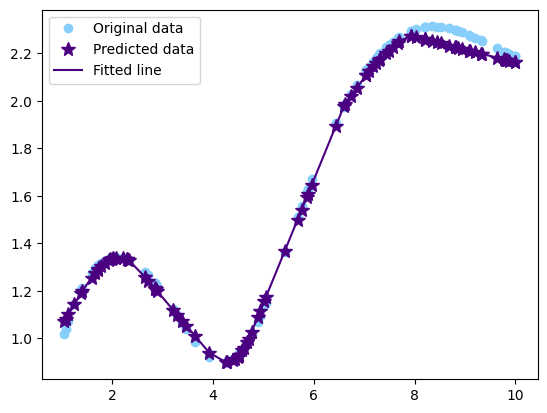

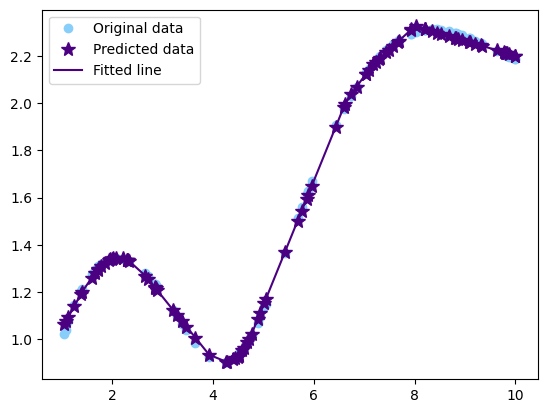

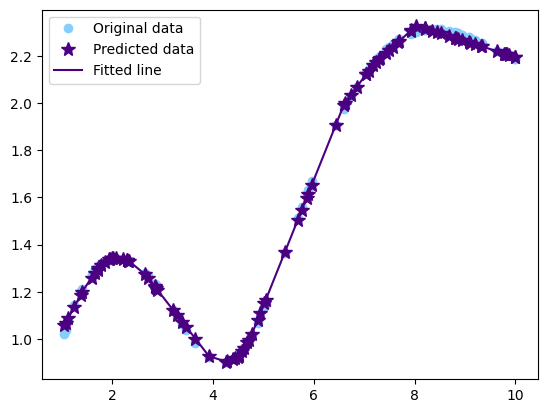

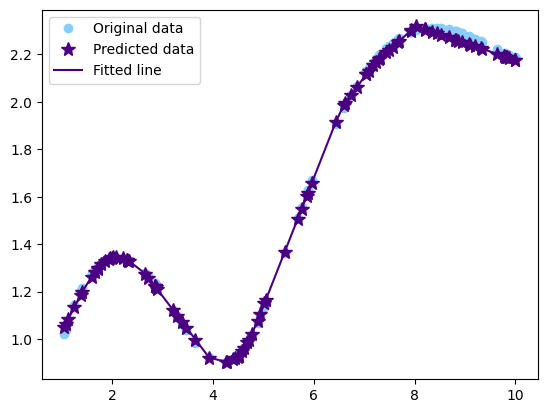

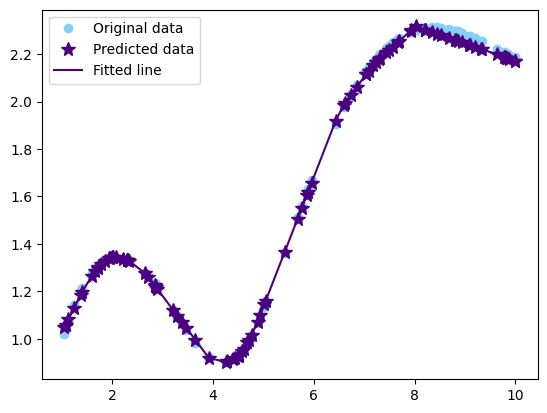

In [10]:
inputs = torch.from_numpy(x2)
targets = torch.from_numpy(y2)

for epoch in range(num_epochs):

    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 3000 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        plt.figure()
        plt.plot(inputs.numpy(), targets.numpy(), 'o', color = 'lightskyblue', label='Original data')
        plt.plot(inputs.numpy(), outputs.detach().numpy(), '*', markersize=10, color = 'indigo', label = 'Predicted data')
        plt.plot(inputs.numpy(), outputs.detach().numpy(), color = 'indigo', label='Fitted line')
        plt.legend()